# Analisis del espectro IR de CO$_2$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

En este caso vamos a estudiar el espectro correspondiente al estiramiento asimétrico del CO$_2$

In [3]:
data = np.loadtxt("co2_columns.dat")
data

array([[2.28901e+03, 3.18300e+01],
       [2.29018e+03, 3.15500e+01],
       [2.29158e+03, 3.00950e+01],
       [2.29441e+03, 3.05030e+01],
       [2.29596e+03, 2.81730e+01],
       [2.29835e+03, 2.63560e+01],
       [2.30050e+03, 2.55390e+01],
       [2.30261e+03, 2.31260e+01],
       [2.30362e+03, 2.89010e+01],
       [2.30475e+03, 2.08340e+01],
       [2.30569e+03, 2.88260e+01],
       [2.30687e+03, 1.90100e+01],
       [2.30899e+03, 1.70330e+01],
       [2.31112e+03, 1.45310e+01],
       [2.31318e+03, 1.20960e+01],
       [2.31519e+03, 1.04520e+01],
       [2.31615e+03, 2.41010e+01],
       [2.31717e+03, 9.01200e+00],
       [2.31912e+03, 6.86300e+00],
       [2.32109e+03, 6.17400e+00],
       [2.32307e+03, 5.09300e+00],
       [2.32496e+03, 5.10900e+00],
       [2.32683e+03, 4.42600e+00],
       [2.32870e+03, 3.51000e+00],
       [2.33052e+03, 3.08400e+00],
       [2.33234e+03, 2.81200e+00],
       [2.33413e+03, 3.19400e+00],
       [2.33591e+03, 2.87500e+00],
       [2.33764e+03,

A continuación, identificamos el **origen de banda**. Para ello calculamos la diferencia entre picos sucesivos

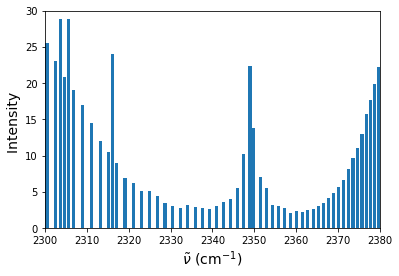

In [9]:
fig, ax = plt.subplots() 
ax.bar(data[:,0], data[:,1], width=0.75)
ax.set_ylim(0, 30)
ax.set_xlim(2300, 2380)
# ax.axvline(22,0,10, ls='--', c='k', lw=1)
ax.set_xlabel(r'$\tilde{\nu}$ (cm$^{-1}$) ', fontsize=14)
_ = ax.set_ylabel(r'Intensity ', fontsize=14)

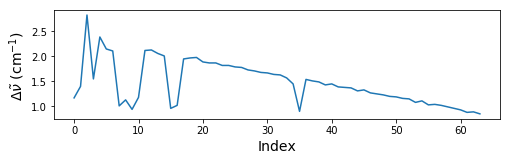

In [10]:
fig, ax = plt.subplots(figsize=(8,2)) 
ax.plot([data[i,0] - data[i-1,0] for i in range(1,len(data))])
#ax.set_ylim(0,10)
#ax.axvline(22,0,10, ls='--', c='k', lw=1)
ax.set_xlabel('Index', fontsize=14)
_ = ax.set_ylabel(r'$\Delta\tilde{\nu}$ (cm$^{-1}$) ', fontsize=14)

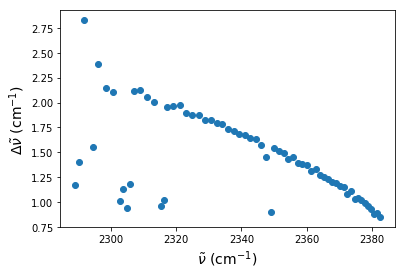

In [12]:
fig, ax = plt.subplots() 
ax.plot(data[:-1,0], [data[i,0] - data[i-1,0] for i in range(1,len(data))], 'o')
# ax.set_ylim(0,10)
# ax.axvline(22,0,10, ls='--', c='k', lw=1)
ax.set_xlabel(r'$\tilde{\nu}$ (cm$^{-1}$) ', fontsize=14)
_ = ax.set_ylabel(r'$\Delta\tilde{\nu}$ (cm$^{-1}$) ', fontsize=14)

In [15]:
Pbranch = np.array([x for x in reversed(data[:35])])
print ("Rama P hasta ...", Pbranch[0])
Rbranch = data[36:]
print ("Rama R desde ...", Rbranch[0])

Rama P hasta ... [2347.54    10.189]
Rama R desde ... [2349.89    13.882]


### Cálculo de las constantes rotacionales

En esta molécula, debido a consideraciones de simetría, sólo se observan los picos correspondientes a niveles de rotación pares en el nivel fundamental, $v=0$, y los impares en el nivel vibracional excitado, $v=1$. Además, vamos a ignorar el acomplamiento roto-vibracional. Por tanto, allí donde encontramos el mayor espaciado podremos establecer que la diferencia es de $\tilde{\nu}(R_0)-\tilde{\nu}(P_2)=6B$

In [22]:
B = 1/6*(Rbranch[0,0] - Pbranch[0,0])
print ("B = %6.4f cm^-1"%(B))

B = 0.3917 cm^-1


A continuación calculamos el **origen de banda**, $\tilde{\nu}_0$, a partir de los valores de $\tilde{\nu}(R_0)$ o bien de $\tilde{\nu}(P_2)$. Las expresiones que vamos a utilizar son:
$$
\tilde{\nu}_0=\tilde{\nu}(0\rightarrow 1)=\tilde{\nu}(R_0) - 2B
$$
$$
\tilde{\nu}_0=\tilde{\nu}(2\rightarrow 1) + 4B
$$

In [23]:
nu0 = Pbranch[0,0] + 4*B
print ("%g cm^-1"%nu0)
nu0 = Rbranch[0,0] - 2*B
print ("%g cm^-1"%nu0)

2349.11 cm^-1
2349.11 cm^-1


En este caso asumimos que el sistema se comporta como un oscilador armónico, y por tanto $\tilde{\nu}_0=\omega_e$. 
A continuación, obtenemos el valor para la **constante de fuerza** del enlace, $k$, que derivamos a partir de la expresión
$$
\tilde{\omega_e}=\frac{1}{2\pi c}\sqrt{\frac{k}{\mu}}
$$
Por tanto, la constante se puede obtener a partir de parámetros que nos son conocidos
$$
k=\mu \tilde{\omega}_e4\pi^2c^2
$$
donde $\mu$ es la **masa reducida** que podemos calcular como $\mu=m_\mathrm{C}m_\mathrm{O}/(m_\mathrm{O}+2m_\mathrm{C})/N_\mathrm{A}$


In [25]:
c = 3.e10 # m/s
mu = 12e-3*16e-3/(2*12e-3+16e-3)*1/6.022e23 
print ("mu = %g kg"%mu)
k = mu*(nu0*2.*np.pi*c)**2
print ("k = %g N/m"%k)

mu = 7.97077e-27 kg
k = 1562.82 N/m


A partir del valor del valor de $B$ podemos calcular también el **momento de inercia**, $I$,
$$
I=\frac{h}{8\pi^2Bc}
$$

In [34]:
h = 6.62607004e-34 # m2*kg/s
I = h/(8*np.pi**2*B*c)
print ("I = %g kg/m^2"%I)

I = 7.14214e-46 kg/m^2


El momento de inercia para una molécula diatómnica se define como $I=\mu R_{eq}^2$. Despejando la distancia de equilibrio,
$$
R_{eq} = \sqrt{\frac{I}{2m}}
$$

In [35]:
Req = np.sqrt(I*6.022e23/(2*16e-3))
print ("Req = %g m"%Req)

Req = 1.15934e-10 m
